In [7]:
# @toffanetto
import numpy as np
import classification as cl
import matplotlib.pyplot as plt

In [8]:
# Getting train data
X_train, y_train = cl.getData(train=True, raw= False)

# Getting test data
X_test, y_test = cl.getData(train=False, raw= False)

In [9]:
# Plotting classes balancing



In [10]:
# Training

W, hit_train, hit_val, dJ = cl.trainClassifier(X=X_train,y=y_train,epochs=200,batch=True)


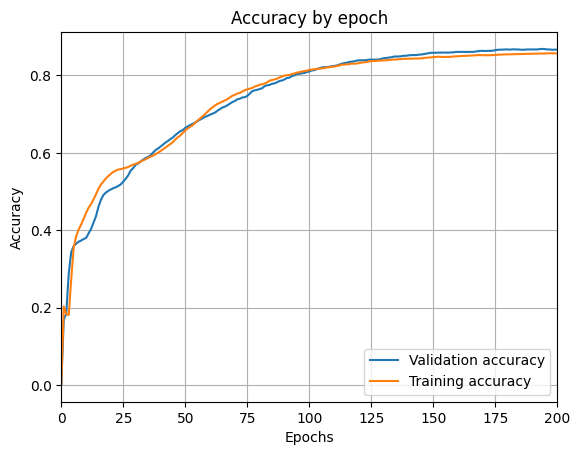

In [11]:
plt.figure()
plt.plot(hit_val, label='Validation accuracy')
plt.plot(hit_train, label='Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy by epoch")
plt.legend(loc='lower right')
plt.xlim([0,200])
plt.grid()

plt.savefig("../plot/LR_1/Accuracy_by_epoch_batch-2.pdf", format="pdf", bbox_inches="tight")

In [12]:
# Testing

y_test_hat, class_y_hat = cl.classify(x=X_test,W=W)

# for i in range(len(y_test)):
#     print('| '+str(y_test[i])+' -> '+str(class_y_hat[i]))

confusion_matrix, hit_rate, not_hit_rate = cl.rateModel(y=y_test,y_hat=class_y_hat)

print('Confusion Matrix: \n'+str(confusion_matrix))
print('hit_rate = '+str(hit_rate))


Confusion Matrix: 
[[494.   0.   2.   0.   0.   0.]
 [ 48. 423.   0.   0.   0.   0.]
 [165.  35. 220.   0.   0.   0.]
 [  0.   3.   0. 286. 199.   3.]
 [  0.   0.   0.  31. 501.   0.]
 [  0.   0.   0.   0.   0. 537.]]
hit_rate = 0.835086528673227
